# Compare different correlation length on precipitation fields

In [1]:
import toml, subprocess, glob
import xarray as xr
import matplotlib.pyplot as plt

# Just two user-defined parameters 

In [2]:
# spatial correlation length
clen = [10, 100, 400] # prcp; km 

# CPU number
ncpu = 5

# Run GPEP experiements
One clen value using 5 CPUs need ~80 seconds.

In [3]:
infile_config = 'demo1.prcp.config.toml'

for cl in clen:
    
    # create configuration file from a template
    config = toml.load(infile_config)
    config['outpath_parent'] = f'./GPEP_demo_cases/cali2017/outputs_demo1_prcp_clen{cl}'
    config['clen'] = [cl]
    
    # save to a new configuration file
    outfile = infile_config.replace('demo1', f'demo1_clen{cl}')
    with open(outfile, 'w') as f:
        toml.dump(config, f)
        
    # run the demo case
    _ = subprocess.run(f'python ./GPEP/src/main.py {outfile}', shell=True)

##################################################
Configuration file: demo1_clen10.prcp.config.toml
################################################## 


##################################################
Merging individual station files to one single file
##################################################
Input station list:      
Input station folder:    
Output station file:     /Users/guoqiang/Github/meteorological_dataset/GPEP_OU_demo/./GPEP_demo_cases/cali2017/outputs_demo1_prcp_clen10/stn_info/all_station_data.nc
Target variables:        ['prcp']
input_stn_all exists:     ./GPEP_demo_cases/cali2017/outputs/stn_info/all_station_data.nc
reading station info from ./GPEP_demo_cases/cali2017/outputs/stn_info/all_station_data.nc instead of individual files
Transform variables if relevant settings are provided
Perform boxcox transformation for prcp. Add a new variable prcp_boxcox to output station file.
prcp_boxcox exists in ds_stn. no need to perform transformation
Time cost (s) for 

# Visualize results

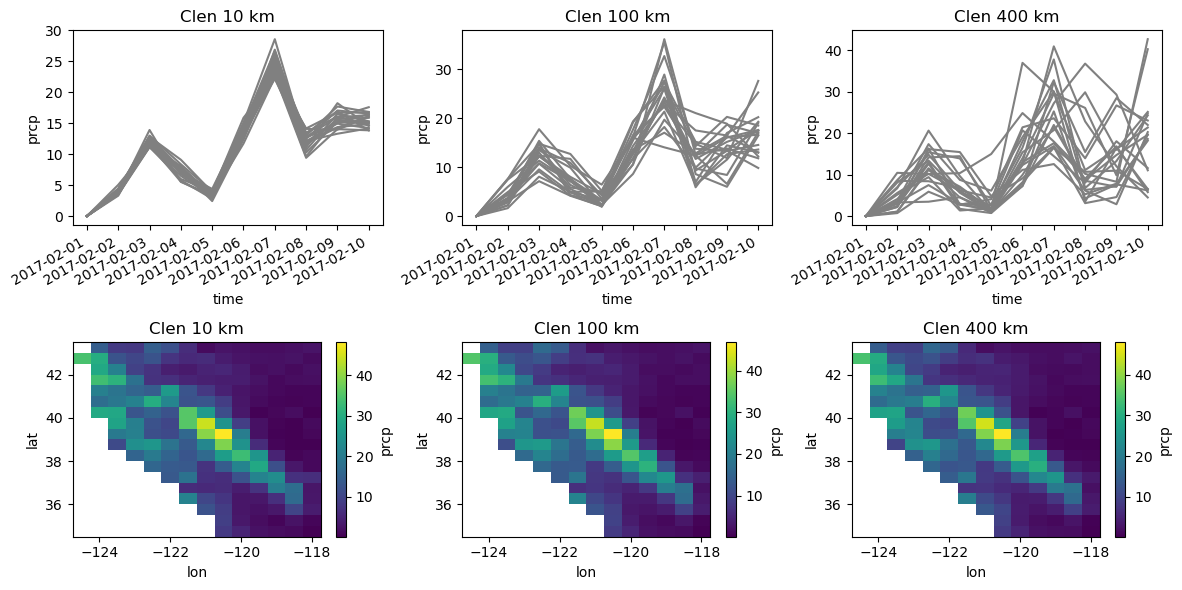

In [6]:
fig = plt.figure(figsize=[12, 6])
v = 'prcp'

for i in range(len(clen)):

    infiles = glob.glob(f'./GPEP_demo_cases/cali2017/outputs_demo1_prcp_clen{clen[i]}/ensembles/*.nc')
    infiles.sort()
    ds = xr.open_mfdataset(infiles, combine='nested', concat_dim='ens')
    ds = ds.load()
    
    fig.add_subplot(2,3,i+1)
    daplot = ds[v].mean(dim=('lat', 'lon'))
    num_ens = len(daplot.ens)
    for e in range(num_ens):
        daplot.isel(ens=e).plot(color='grey')
    plt.title(f'Clen {clen[i]} km')
    
    
    fig.add_subplot(2,3,i+4)
    daplot = ds[v].mean(dim=('ens', 'time'))
    daplot.plot()
    plt.title(f'Clen {clen[i]} km')

plt.tight_layout()
plt.show()